In [4]:
from operators import *
from backtest import *
import pandas as pd
import numpy as np
import os
from typing import Iterable
# import alphalens as als
import quantstats as qs
import matplotlib.pyplot as plt
import pickle
# extend pandas functionality with metrics, etc.
# qs.extend_pandas()

target_folder_path = rf'/Users/tedting/Documents/PEAD'
%cd "{target_folder_path}"

/Users/tedting/Documents/Alpha/OFFICIAL_data_2


/Users/tedting/anaconda3/envs/quant39/lib/python3.9/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
adj_open = pd.read_pickle(rf'{target_folder_path}/adj_open.pkl')
exp_returns = adj_open.pct_change().shift(-2)

Close = pd.read_pickle(rf'{target_folder_path}/close.pkl')
Volume = pd.read_pickle(rf'{target_folder_path}/volume.pkl')
Limit = pd.read_pickle(rf'{target_folder_path}/limit.pkl')

ZTXA = pd.read_pickle(rf'{target_folder_path}/ZTXA_close.pkl')
Benchmark = ZTXA['ZTXA 台指近月期貨指數'].pct_change().shift(-2)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/tedting/Documents/Alpha/OFFICIAL_data_2/adj_open.pkl'

In [3]:
import pandas as pd
target_folder_path = '/Users/tedting/Documents/Alpha/data'
factor_base = pd.read_csv(rf'{target_folder_path}/data_DM/WR_result.csv')
expression_list = factor_base['expression'].to_list()
unique_list = list(set(expression_list))
unique_list

['ts_mean( log( 合計持股率 ) ,209)',
 'ts_mean( 總外資市值_點 ,164)',
 'cs_rank( 外資買賣超 )',
 'ts_sum( 以合併總損益為主單月稅後盈餘 ,157)',
 'abs( 投信買進張數 )',
 'cs_rank( ts_delta( 投信買進張數 ,353) )',
 'ts_max( cs_rank( 合計買賣超 ) ,162)',
 'abs( 投信買賣超 )',
 'cs_rank( 合併單月營業利益 )',
 'log( 投信買賣超 )',
 'ts_sum( 投信持股率 ,241)',
 'abs( ts_sum( 歸屬母公司單月稅後盈餘 ,150) )',
 'abs( ts_rank( 合計持股數市值 ,425) )',
 'ts_delta( 投信買進張數 ,109)',
 'ts_product( 合併單月營業利益率 ,240)',
 'ts_mean( 總外資市值_點 ,427)',
 'ts_mean( 自營商自行買進張數 ,166)',
 'ts_rank( 合計持股數市值 ,425)',
 'ts_sum( 投信賣出張數 ,82)',
 'ts_sum( 歸屬母公司單月稅後盈餘 ,150)',
 'ts_sum( 合計買賣超 ,83)',
 'abs( ts_product( 每股淨值 ,122) )',
 'log( ts_max( 自營商自行買進張數 ,351) )',
 'log( ts_sum( 投信賣出張數 ,82) )',
 'log( 投信持股率 )',
 'abs( ts_sum( 以合併總損益為主單月稅後盈餘 ,157) )',
 'ts_delta( 投信買賣超市值 ,342)',
 'cs_rank( 投信買進張數 )',
 'cs_rank( 投信持股數 )',
 'log( 單月營業利益 )',
 'abs( ts_product( 合併單月營業利益率 ,240) )',
 'ts_rank( cs_rank( 投信持股數 ) ,26)',
 'ts_stddev( 投信買賣超 ,168)',
 'ts_delta( cs_rank( 投信買賣超市值 ) ,224)',
 'ts_rank( cs_rank( 外資買賣超 ) ,131)',
 '

In [3]:
W_RevenueGrowthRate = pd.read_pickle(rf'{target_folder_path}/W_RevenueGrowthRate.pkl')
W_OperatingProfit = pd.read_pickle(rf'{target_folder_path}/W_OperatingProfit.pkl')
W_ROE_A_AfterTax = pd.read_pickle(rf'{target_folder_path}/W_ROE_A_AfterTax.pkl')
W_NetProfitMargin_AfterTax = pd.read_pickle(rf'{target_folder_path}/W_NetProfitMargin_AfterTax.pkl')
W_GrossProfitMargin = pd.read_pickle(rf'{target_folder_path}/W_GrossProfitMargin.pkl')
W_GrossProfitGrowthRate = pd.read_pickle(rf'{target_folder_path}/W_GrossProfitGrowthRate.pkl')
W_OperatingProfitGrowthRate = pd.read_pickle(rf'{target_folder_path}/W_OperatingProfitGrowthRate.pkl')

W_REV_m = pd.read_pickle(rf'{target_folder_path}/W_REV_m.pkl')
W_REV_G_m = pd.read_pickle(rf'{target_folder_path}/W_REV_G_m.pkl')
W_REV_pers_m = pd.read_pickle(rf'{target_folder_path}/W_REV_pers_m.pkl')

In [13]:
from functools import reduce

dfs = [#W_RevenueGrowthRate,
       #W_OperatingProfit,
       #W_ROE_A_AfterTax,
       #W_NetProfitMargin_AfterTax,
       #W_GrossProfitMargin,
       W_GrossProfitGrowthRate,
       #W_OperatingProfitGrowthRate,
       #W_REV_m,
       W_REV_G_m,
       #W_REV_pers_m
       ]

# 使用 reduce 進行累加
result_df = reduce(lambda x, y: x.add(y, fill_value=0), dfs)
result_df

symbol,000116,000930,000960,0009A0,1101,1102,1103,1104,1107,1108,...,9945,9946,9949,9950,9951,9955,9958,9960,9962,L2301
2013-01-02,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-01-03,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-01-04,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-01-07,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-01-08,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-27,0.0,0.0,0.0,0.0,0.001879,0.003154,0.0,0.0,0.0,0.0,...,-0.003631,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-11-28,0.0,0.0,0.0,0.0,0.001860,0.003113,0.0,0.0,0.0,0.0,...,-0.003628,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-11-29,0.0,0.0,0.0,0.0,0.001805,0.003018,0.0,0.0,0.0,0.0,...,-0.003608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-11-30,0.0,0.0,0.0,0.0,0.001794,0.002993,0.0,0.0,0.0,0.0,...,-0.003611,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
Volume_y_avg = Volume.rolling(252).mean()
Close_y_avg = Close.rolling(252).mean()
heavy_Filter = Close_y_avg < 1000 
Volume_Filter = Volume_y_avg > 200
trade_volume_Filter = Close_y_avg * Volume_y_avg > 60000
small_aum_Filter = Volume_Filter & trade_volume_Filter
small_aum_Filter2 = Volume_Filter & trade_volume_Filter & heavy_Filter # & Limit
result_df = result_df[small_aum_Filter2]

In [6]:
# # 多因子策略完整展現
# buy_fee:float=0.001425*0.3
# sell_fee:float=0.001425*0.3+0.003
# start_time = '2013-06-01'
# end_time = '2023-11-30'
# daily_weight = result_df.loc[start_time:end_time]
# expreturn = exp_returns.loc[start_time:end_time]
# weights = result_df.loc[start_time:end_time]
# delta_weight = weights.shift(1) - weights
# buy_fees = delta_weight[delta_weight > 0]*(buy_fee)
# buy_fees = buy_fees.fillna(0)
# sell_fees = delta_weight.abs()[delta_weight < 0]*(sell_fee)
# sell_fees = sell_fees.fillna(0)
# fee = buy_fees + sell_fees
# daily_fee = fee.sum(axis = 1)
# daily_profit = (daily_weight * expreturn).sum(axis=1)
# daily_returns = daily_profit - daily_fee


In [7]:
ZTXA = pd.read_pickle(rf'{target_folder_path}/ZTXA_close.pkl')
Benchmark = ZTXA['ZTXA 台指近月期貨指數'].pct_change().shift(-2)


### 模擬實倉

/var/folders/fx/jn0gghjd4cg68lr15nlpsbqr0000gn/T/ipykernel_5676/3288529321.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  top_equalweight = top.applymap(lambda x: 1/stocks if x != 0 else 0)


Error at index 2014-02-24 00:00:00: value is 0.9999999999999999
Error at index 2014-02-25 00:00:00: value is 0.9999999999999999
Error at index 2014-02-26 00:00:00: value is 0.9999999999999999
Error at index 2014-02-27 00:00:00: value is 0.9999999999999999
Error at index 2014-03-03 00:00:00: value is 0.9999999999999999
Error at index 2014-03-04 00:00:00: value is 0.9999999999999999
Error at index 2014-03-05 00:00:00: value is 0.9999999999999999
Error at index 2014-03-06 00:00:00: value is 0.9999999999999999
Error at index 2014-03-07 00:00:00: value is 0.9999999999999999
Error at index 2014-03-10 00:00:00: value is 0.9999999999999999
Error at index 2014-03-11 00:00:00: value is 0.9999999999999999
Error at index 2014-03-12 00:00:00: value is 0.9999999999999999
Error at index 2014-03-13 00:00:00: value is 0.9999999999999999
Error at index 2014-03-14 00:00:00: value is 0.9999999999999999
Error at index 2014-03-17 00:00:00: value is 0.9999999999999999
Error at index 2014-03-18 00:00:00: valu

/Users/tedting/anaconda3/envs/quant39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/Users/tedting/anaconda3/envs/quant39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/Users/tedting/anaconda3/envs/quant39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass ax

                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2013-01-02  2013-01-02
End Period                 2023-11-30  2023-11-30
Risk-Free Rate             0.0%        0.0%
Time in Market             100.0%      100.0%

Cumulative Return          478.42%     123.73%
CAGR﹪                     17.44%      7.66%

Sharpe                     1.06        0.55
Prob. Sharpe Ratio         99.96%      96.22%
Smart Sharpe               1.01        0.52
Sortino                    1.47        0.76
Smart Sortino              1.39        0.72
Sortino/√2                 1.04        0.54
Smart Sortino/√2           0.98        0.51
Omega                      1.21        1.21

Max Drawdown               -28.65%     -31.51%
Longest DD Days            428         748
Volatility (ann.)          16.94%      16.11%
R^2                        0.52        0.52
Information Ratio          0.05        0.05
Calmar                     0.61       

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2020-01-17,2020-03-17,2020-06-02,137,-28.648288,-28.577948
2,2015-05-27,2015-08-21,2016-07-28,428,-25.351062,-20.968744
3,2022-03-29,2022-10-24,2023-04-12,379,-24.956527,-24.334522
4,2018-06-11,2018-10-25,2019-04-12,305,-23.476022,-22.934507
5,2021-04-27,2021-05-13,2021-06-22,56,-14.810117,-11.056360


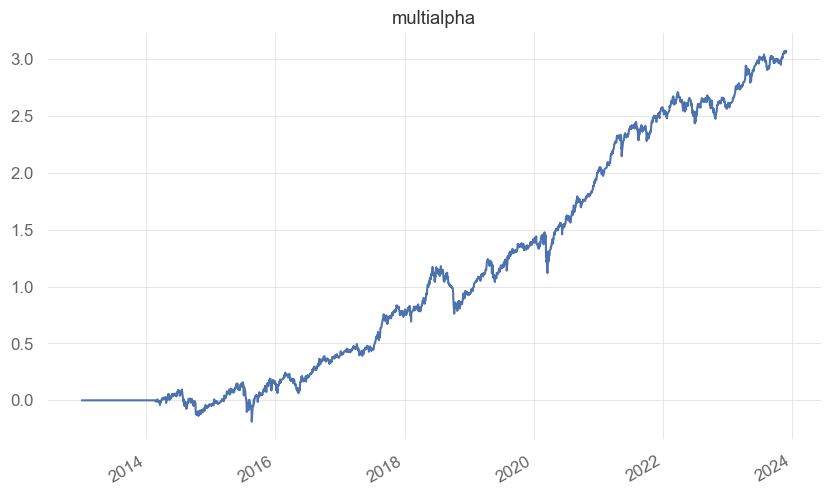

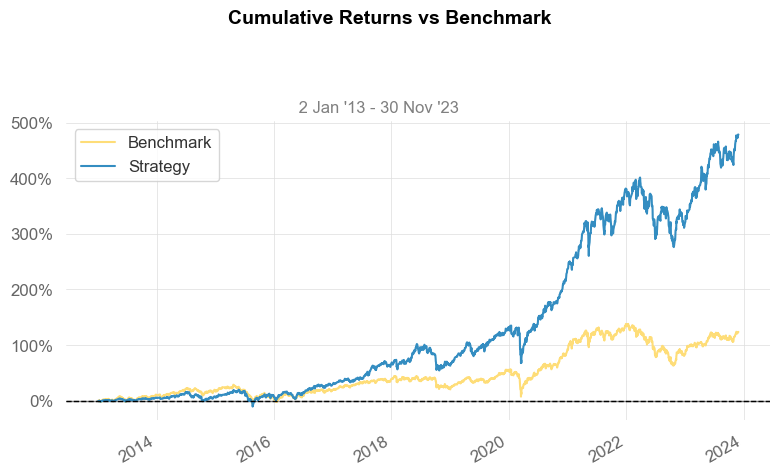

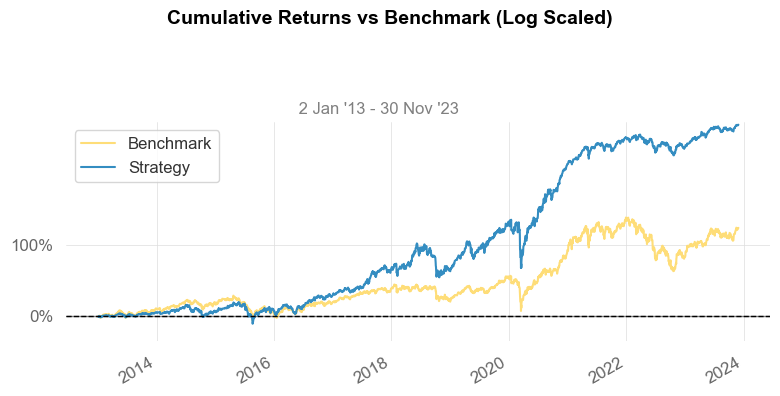

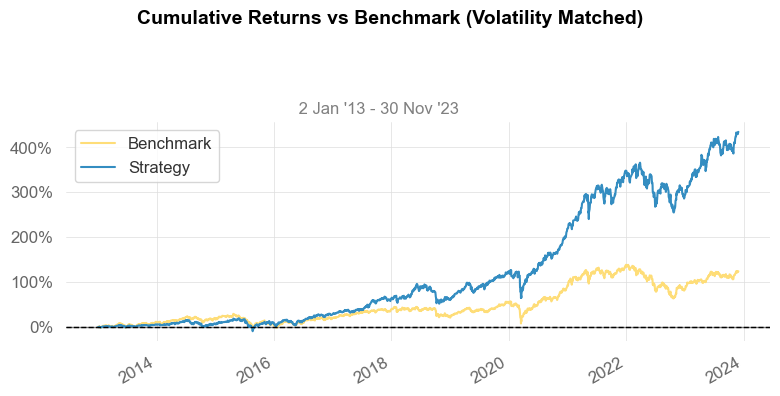

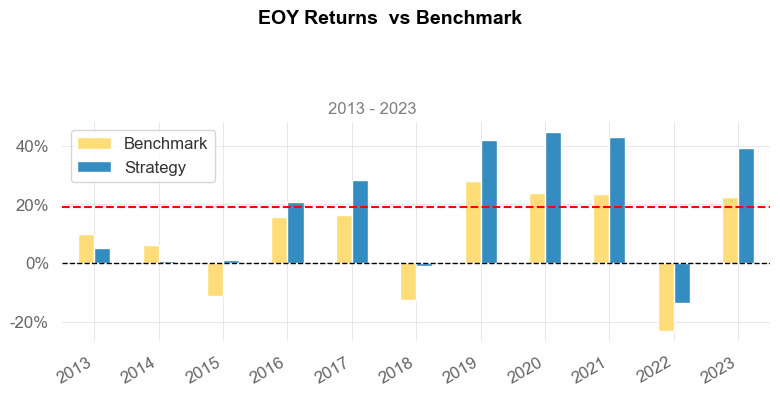

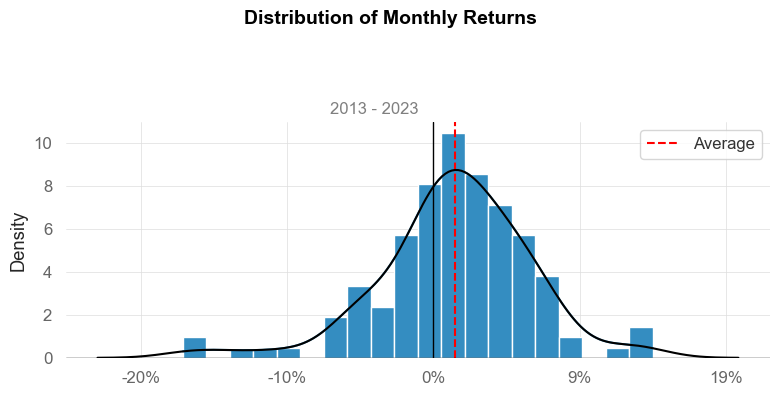

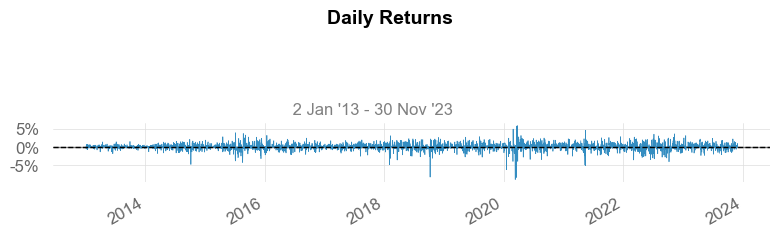

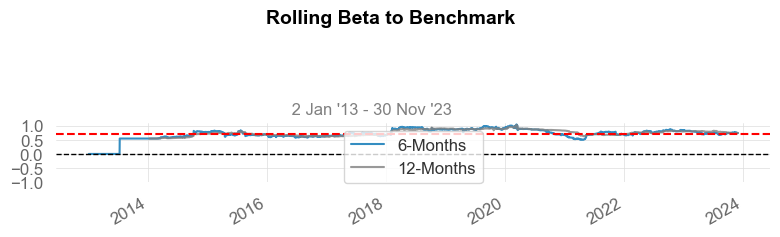

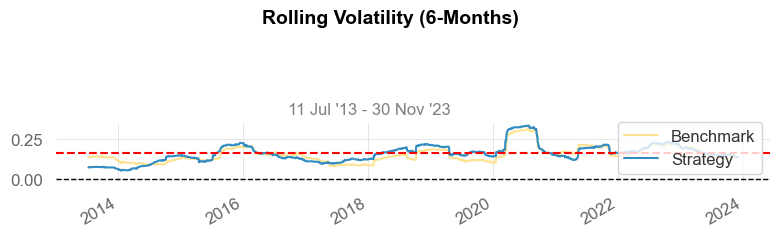

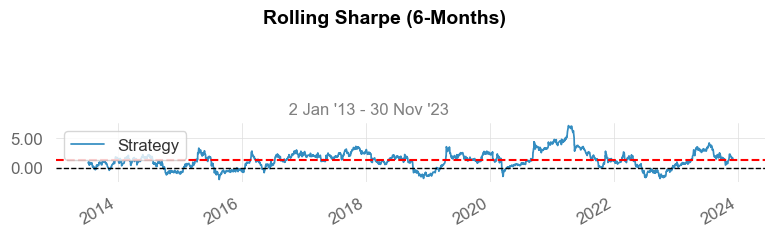

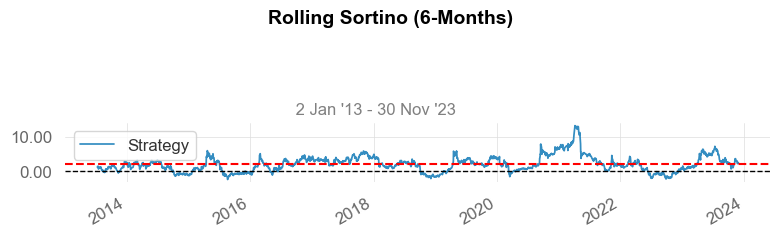

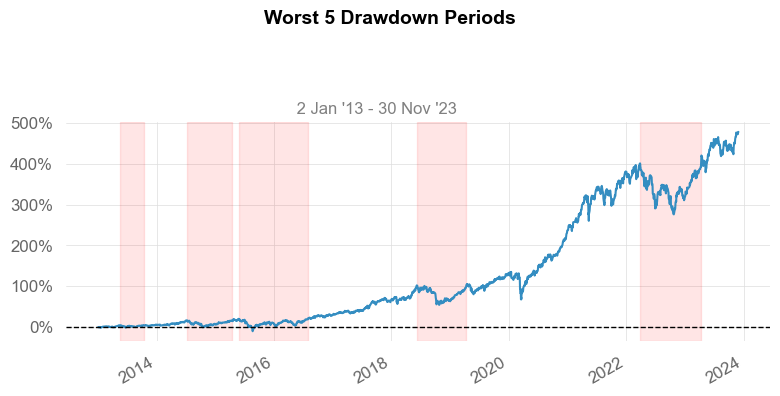

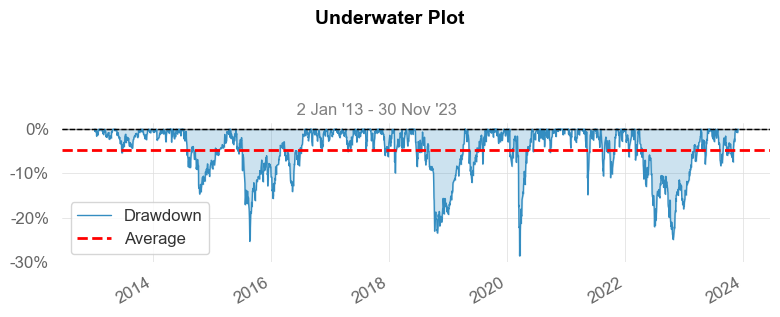

TypeError: pivot() takes 1 positional argument but 4 were given

In [ ]:
stocks = 10
top = result_df.apply(lambda row: row.nlargest(stocks), axis=1).fillna(0)
top_equalweight = top.applymap(lambda x: 1/stocks if x != 0 else 0)
test = top_equalweight.sum(axis =1)
for index, value in test.items():
    if value < 0.95:
        print(f"Error at index {index}: value is {value}")
buy_fee:float=0.001425*0.3
sell_fee:float=0.001425*0.3+0.003
start_time = '2013-01-02' # '2014-05-09'
end_time = '2023-11-30'
# expreturn = exp_returns.loc[start_time:end_time]
# weight = result_df.loc[start_time:end_time]
weight = top_equalweight.loc[start_time:end_time]
expreturn = exp_returns .loc[start_time:end_time]
delta_weight = weight.shift(1) - weight
buy_fees = delta_weight[delta_weight > 0]*(buy_fee)
buy_fees = buy_fees.fillna(0)
sell_fees = delta_weight.abs()[delta_weight < 0]*(sell_fee)
sell_fees = sell_fees.fillna(0)
fee = buy_fees + sell_fees
daily_fee = fee.sum(axis = 1)
daily_profit = (weight * expreturn).sum(axis=1)
daily_returns = daily_profit - daily_fee

daily_returns.cumsum().plot(title = 'multialpha')

qs.reports.full(daily_returns*5/11+Benchmark.loc[start_time:end_time]*6/11,Benchmark)

In [28]:
correlation = Benchmark.loc[start_time:end_time].corr(daily_returns.loc[start_time:end_time])
print("Correlation:", correlation)

Correlation: 0.28054234538033496


In [29]:
volatility = daily_returns.std()
print(volatility)
volatility = Benchmark.std()
print(volatility)

0.016949107585952805
0.014870224704029749


In [22]:
def ols_regression(X, y):
    # 為 X 增加常數列
    X = np.column_stack((np.ones(X.shape[0]), X))
    
    # 使用公式計算係數：(X'X)^(-1)X'Y
    beta = np.linalg.inv(X.T @ X) @ X.T @ y
    return beta
